# EV News Articles Sentiment Analysis
Performing news article sentiment analysis of EV vehicles in Australia involves several steps, from data collection to sentiment analysis and visualization. Although the sentiments of people vary across various regions in Australia, I have presented a broad analysis of the Electric Vehicle industry through four online articles. The articles for this project were taken from the following links:

1. https://thedriven.io/2024/02/23/most-australians-think-there-are-too-few-public-charging-stations-to-support-evs/
2. https://www.ey.com/en_au/sustainability/why-consumers-are-charging-toward-electric-vehicles
3. https://www.sydney.edu.au/news-opinion/news/2024/04/10/evs-face-future-challenges-despite-increasing-uptake-.html
4. https://www.carexpert.com.au/car-news/evs-in-australia-report-outlines-sales-and-improving-consumer-sentiment

# Procedure
Performing news article sentiment analysis of EV vehicles in Australia involves several steps, from data collection to sentiment analysis and visualization. These steps are summarized further.
## Step 1: Data Collection
After gathering the news articles for EVs, I used the technique of **web scraping** to extract meaningful information from the articles like the title, the publication date of the article and its broad content. For this purpose, I used web scraping tools like BeautifulSoup which is imported in the first cell along with other important libraries. After that, I have initialized all the URLs as an array.

In [80]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time



In [81]:
# List of article URLs
urls = [
    'https://thedriven.io/2024/02/23/most-australians-think-there-are-too-few-public-charging-stations-to-support-evs/',
    'https://www.ey.com/en_au/sustainability/why-consumers-are-charging-toward-electric-vehicles',
    'https://www.sydney.edu.au/news-opinion/news/2024/04/10/evs-face-future-challenges-despite-increasing-uptake-.html',
    'https://www.carexpert.com.au/car-news/evs-in-australia-report-outlines-sales-and-improving-consumer-sentiment',
    
]


In [82]:
# Initialize a list to store article data
articles_data = []


## Step 2: Scraping an Article with Improved Selectors
After initializing an empty list to store article data named **articles_data**, I have defined a function **scrape_article** to fetch and parse a single article. It returns the details of an article, including its title, author, publication date, and content. Within the function, **headers** represents a dictionary with the User-Agent header. This helps to mimic a request from a web browser, which can be useful to avoid blocks from some websites that restrict automated scraping. Then an HTTP GET request was sent to the specified URL with the custom headers.

The **BeautifulSoup (response.content, 'html.parser')** function parses the HTML content of the web page, creating a BeautifulSoup object for further extraction.I manually checked the structure of the HTML for each website to determine the correct selectors. This step required viewing the source code of each of the webpages.

In [83]:
def scrape_article(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        # Fetch the web page
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Initialize variables
        title = 'No title found'
        author = 'No author found'
        publication_date = 'No date found'
        content = 'No content found'

        # Check URL and set selectors accordingly
        if 'thedriven.io' in url:
            title = soup.find('h1').get_text(strip=True) if soup.find('h1') else 'No title found'
            author_tag = soup.find('a', class_='url fn n')
            author = author_tag.get_text(strip=True) if author_tag else 'No author found'
            date_tag = soup.find('a', rel='bookmark')
            publication_date = date_tag.get_text(strip=True) if date_tag else 'No date found'
            content = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])

        elif 'ey.com' in url:
            title = soup.find('h1').get_text(strip=True) if soup.find('h1') else 'No title found'
            authors = [a.get_text(strip=True) for a in soup.find_all('a', class_='surfaceProfile-author-link')]
            author = ', '.join(authors) if authors else 'No author found'
            date_tag = soup.select_one('#container4 > div > div:nth-child(2) > div > div > span:nth-child(2)')
            publication_date = date_tag.get_text(strip=True) if date_tag else 'No date found'
            content = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])

        elif 'sydney.edu.au' in url:
            title = soup.find('h1').get_text(strip=True) if soup.find('h1') else 'No title found'
            author_tag = soup.find('h3', class_='b-contact-information__title')
            author = author_tag.get_text(strip=True) if author_tag else 'No author found'
            date_tag = soup.find('span')
            publication_date = date_tag.get_text(strip=True) if date_tag else 'No date found'
            content = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])

        elif 'carexpert.com.au' in url:
            title = soup.find('h1').get_text(strip=True) if soup.find('h1') else 'No title found'
            author_tag = soup.find('div', class_='gubuy9f')
            author = author_tag.get_text(strip=True) if author_tag else 'No author found'
            date_tag = soup.find('time')
            publication_date = date_tag.get_text(strip=True) if date_tag else 'No date found'
            content = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])

        # Store the data
        article_data = {
            'title': title,
            'author': author,
            'publication_date': publication_date,
            'content': content
        }

        # Print success message
        print(f'Successfully scraped {url}')
        
        return article_data
    
    except Exception as e:
        # Handle errors (e.g., missing elements, request errors)
        print(f'Error fetching {url}: {e}')
        return None


The below code iterates over a list of URLs, scraping article data from each URL using the **scrape_article** function, and then appends the collected data to a list. It also includes an optional delay of 2 seconds between requests to avoid overloading the server.



In [84]:
for url in urls:
    article_data = scrape_article(url)
    if article_data:
        articles_data.append(article_data)
    
    # Optional: Delay between requests to avoid overwhelming the server
    time.sleep(2)


Successfully scraped https://thedriven.io/2024/02/23/most-australians-think-there-are-too-few-public-charging-stations-to-support-evs/
Successfully scraped https://www.ey.com/en_au/sustainability/why-consumers-are-charging-toward-electric-vehicles
Successfully scraped https://www.sydney.edu.au/news-opinion/news/2024/04/10/evs-face-future-challenges-despite-increasing-uptake-.html
Successfully scraped https://www.carexpert.com.au/car-news/evs-in-australia-report-outlines-sales-and-improving-consumer-sentiment


In the below cell, I have stored the collected articles in a structured format such as CSV or JSON for further processing. It creates a DataFrame from a list of article data, saves it as a CSV file named **ev_articles.csv**, and displays the DataFrame for review. The **pd.Dataframe()** function creates a DataFrame named **articles_df** from the list of dictionaries **articles_data**. Each dictionary in the list represents a row in the DataFrame, with dictionary keys becoming column names.

In [85]:
# Convert the articles data to a DataFrame
articles_df = pd.DataFrame(articles_data)

# Save the DataFrame to a CSV file
articles_df.to_csv('ev_articles.csv', index=False)

# Display the DataFrame
articles_df



,title,author,publication_date,content
0,Most Australians think there are too few publi...,Jennifer Dudley-Nicholson,"February 23, 2024",Most Australians think the nation has too few ...
1,Why Australian consumers are charging toward e...,"Neal Johnston, Glenn Maris, Damien Smith, Neal...",27 Jul. 2022,The CEO Imperative: Is your strategy set for t...
2,EVs face future challenges despite increasing ...,Harrison Vesey,10 April 2024,Professor David Hensher One in three Australia...
3,"EVs in Australia: Report outlines sales, and i...",Mike Costello,"19 August 2020, 1:56pm",Guest User Australia's electric-vehicle penetr...


## Step 3: Data Preprocessing
To perform data preprocessing for each article, we need to clean and structure the data appropriately. This typically involves removing unwanted characters or HTML tags. Then we need to normalize text by converting it to lowercase, removing extra whitespace, and handling punctuation. After that, we need to break the text into tokens (words). All this is carried out in the further cells. 

In [86]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The **clean_text()** function removes unwanted characters and HTML tags from the text. It uses a regular expression to remove anything that looks like HTML tags. It is also used to remove special characters and numbers since we don' require them for sentiment analysis. It returns a cleaned version of the text with HTML tags, special characters, and extra whitespace removed. 

The **normalize_text()** function normalizes the text by converting it to lowercase and removing extra spaces. First, it converts all characters in the text to lowercase. Then it splits the text into words and then joins them back together with a single space between each word, effectively removing extra spaces. It returns the normalized text with all lowercase characters and consistent spacing.

The **tokenize_text()** function tokenizes the text into individual words and a list of tokens (words) from the text.

The **remove_stop_words()** function remove common stop words from the list of tokens. It returns a list of tokens with stop words removed.

The **stem_tokens()** function apply stemming to the list of tokens. Stemming reduces words to their root form so that the kewords can be analysed easily. It returns a list of stemmed tokens (words reduced to their root form).

Finally, the **lemmatize_tokens()** function applies lemmatization to the list of tokens. Lemmatization reduces words to their base or dictionary form, which is usually more meaningful than stemming. It returns a list of lemmatized tokens (words reduced to their base form).

In [87]:
def clean_text(text):
    """
    Clean the text by removing unwanted characters and HTML tags.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

def normalize_text(text):
    """
    Normalize the text by converting to lowercase and removing extra spaces.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

def tokenize_text(text):
    """
    Tokenize the text into words.
    """
    tokens = word_tokenize(text)
    return tokens

def remove_stop_words(tokens):
    """
    Remove stop words from the tokenized text.
    """
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def stem_tokens(tokens):
    """
    Apply stemming to tokens.
    """
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

def lemmatize_tokens(tokens):
    """
    Apply lemmatization to tokens.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens


This cell applies preprocessing functions to each article’s content, then converts the preprocessed data into a DataFrame and saves it to a CSV file. The **preprocessed_articles** list is initialized as an empty list to store the preprocessed article data. By looping through each article, many steps of preprocessing are applied like removing HTML tags, special characters, and extra whitespace using **clean_text** function, converting the text to lowercase and removing extra spaces using the **normalize_text** function, splitting the text into individual words (tokens) using **tokenize_text** function, filtering out common stop words from the tokens using **remove_stop_words** function and reducing to their root form using **stem_tokens** function.

After all this, the preprocessed text is joined back into a single string and stored in a dictionary along with the article’s title, author, and publication date which is added to the **preprocessed_articles** list. Finally, we convert the list of preprocessed articles into a DataFrame using **pd.DataFrame** function, save it to a CSV file and display the resulting DataFrame to verify the output.


In [88]:
# Apply preprocessing to each article's content
preprocessed_articles = []

for article in articles_data:
    # Clean the text
    cleaned_content = clean_text(article['content'])
    # Normalize the text
    normalized_content = normalize_text(cleaned_content)
    # Tokenize the text
    tokens = tokenize_text(normalized_content)
    # Remove stop words
    filtered_tokens = remove_stop_words(tokens)
    # Optionally apply stemming or lemmatization
    stemmed_tokens = stem_tokens(filtered_tokens)
    # lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    
    # Store preprocessed data
    preprocessed_article = {
        'title': article['title'],
        'author': article['author'],
        'publication_date': article['publication_date'],
        'content': ' '.join(stemmed_tokens)  # Use lemmatized_tokens if preferred
    }
    preprocessed_articles.append(preprocessed_article)
    
# Convert the preprocessed articles data to a DataFrame
preprocessed_articles_df = pd.DataFrame(preprocessed_articles)

# Save the DataFrame to a CSV file
preprocessed_articles_df.to_csv('preprocessed_ev_articles.csv', index=False)

# Display the DataFrame
preprocessed_articles_df


,title,author,publication_date,content
0,Most Australians think there are too few publi...,Jennifer Dudley-Nicholson,"February 23, 2024",australian think nation public charg station s...
1,Why Australian consumers are charging toward e...,"Neal Johnston, Glenn Maris, Damien Smith, Neal...",27 Jul. 2022,ceo imper strategi set takeoff clever govern c...
2,EVs face future challenges despite increasing ...,Harrison Vesey,10 April 2024,professor david hensher one three australian c...
3,"EVs in Australia: Report outlines sales, and i...",Mike Costello,"19 August 2020, 1:56pm",guest user australia electricvehicl penetr wel...


In sentiment analysis, **polarity** and **subjectivity** are two key metrics used to assess the sentiment of a text. 

Polarity measures the sentiment of the text on a scale from -1 to 1. Negative sentiment indicates that the text expresses a strong negative sentiment or emotion. Neutral sentiment indicates that the text is neutral and does not convey any strong positive or negative sentiment. Positive sentiment indicates that the text expresses a strong positive sentiment or emotion.  This can be useful for understanding overall attitudes or reactions.

Subjectivity measures the degree to which the text expresses personal opinions, feelings, or beliefs, as opposed to objective facts. Zero subjectivity means the text is factual and does not include personal opinions or emotions. It is more about reporting facts.A subjectivity of 1 means the text is more personal and opinionated, including personal beliefs, emotions, or feelings. This can be useful for distinguishing between factual reports and personal opinions or feelings.

In [89]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


This code defines a function **analyze_sentiment()** that uses the TextBlob library to analyze the sentiment of a given text. It takes a single argument **text**, which is a string of text that we want to analyze for sentiment. The TextBlob object **blob** has a sentiment property that returns a Sentiment namedtuple - polarity and subjectivity. The function returns the polarity and subjectivity scores as a tuple.

In [90]:
def analyze_sentiment(text):
    """
    Analyze the sentiment of the given text using TextBlob.
    """
    blob = TextBlob(text)
    # Return polarity and subjectivity
    return blob.sentiment.polarity, blob.sentiment.subjectivity


This code performs sentiment analysis on the preprocessed content of each article, stores the results, and saves them to a CSV file. The **sentiment_results[]** is an empty list initialized to store the sentiment analysis results for each article. In the 'for' loop, we iterate through each row in the preprocessed articles DataFrame (**preprocessed_articles_df**). Each row represents an article. For each article, the content is passed to the **analyze_sentiment()** function, which returns the polarity and subjectivity scores.
The results for each article, including its title, author, publication date, content, polarity, and subjectivity, are stored in a dictionary and appended to the above initialized list.
We then conver this list of dictionaries into pandas DataFrame. Finally, the DataFrame is displayed, showing the sentiment analysis results.

In [91]:
# Apply sentiment analysis to each article's content
sentiment_results = []

for index, article in preprocessed_articles_df.iterrows():
    # Analyze sentiment
    polarity, subjectivity = analyze_sentiment(article['content'])
    
    # Store the results
    sentiment_results.append({
        'title': article['title'],
        'author': article['author'],
        'publication_date': article['publication_date'],
        'content': article['content'],
        'polarity': polarity,
        'subjectivity': subjectivity
    })

# Convert the results to a DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Save the sentiment analysis results to a CSV file
sentiment_df.to_csv('sentiment_analysis_results.csv', index=False)

# Display the DataFrame
sentiment_df


,title,author,publication_date,content,polarity,subjectivity
0,Most Australians think there are too few publi...,Jennifer Dudley-Nicholson,"February 23, 2024",australian think nation public charg station s...,0.002210,0.187689
1,Why Australian consumers are charging toward e...,"Neal Johnston, Glenn Maris, Damien Smith, Neal...",27 Jul. 2022,ceo imper strategi set takeoff clever govern c...,0.102000,0.283466
2,EVs face future challenges despite increasing ...,Harrison Vesey,10 April 2024,professor david hensher one three australian c...,0.181563,0.347917
3,"EVs in Australia: Report outlines sales, and i...",Mike Costello,"19 August 2020, 1:56pm",guest user australia electricvehicl penetr wel...,0.011245,0.306212


This code creates a visual representation of the sentiment analysis results for a set of articles, focusing on both polarity and subjectivity. The plotting style is configured to "whitegrid" for a clean and readable background. A figure is setup with two subplots arranged vertically, each subplot having its own set of axes. this code generates two horizontal bar plots within a single figure, visually comparing the polarity and subjectivity of the sentiment analysis for each article.

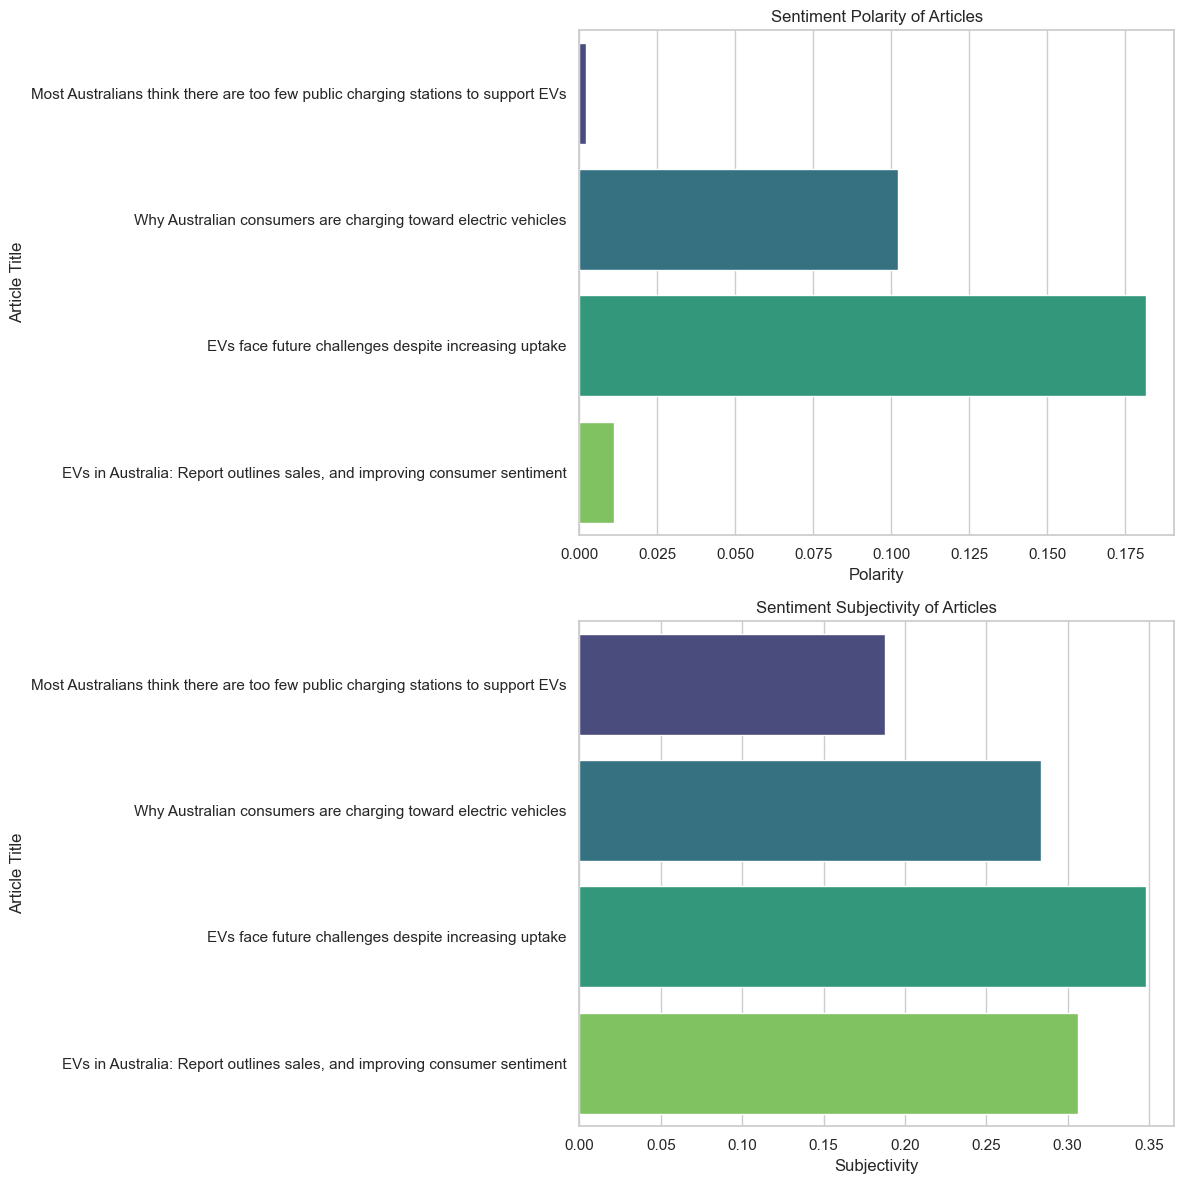

In [92]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # Increase figure height

# Plot polarity (horizontal bars)
sns.barplot(x='polarity', y='title', data=sentiment_df, ax=ax[0], palette='viridis', hue='title', legend=False)
ax[0].set_title('Sentiment Polarity of Articles')
ax[0].set_xlabel('Polarity')
ax[0].set_ylabel('Article Title')

# Plot subjectivity (horizontal bars)
sns.barplot(x='subjectivity', y='title', data=sentiment_df, ax=ax[1], palette='viridis', hue='title', legend=False)
ax[1].set_title('Sentiment Subjectivity of Articles')
ax[1].set_xlabel('Subjectivity')
ax[1].set_ylabel('Article Title')

# Adjust layout
plt.tight_layout()
plt.show()


The overall goal of this code is to analyze sentiment scores (polarity and subjectivity) of articles and aggregate these scores by the year of publication. 
It defines a dictionary data with sample data, including article titles, authors, publication dates, content, polarity, and subjectivity scores and converts the **data** dictionary into a pandas DataFrame named **sentiment_df**.
It defines a function **parse_date()** that attempts to parse date strings into datetime objects using dateutil.parser.parse with the fuzzy=True option to handle various date formats. It applies the **parse_date()** function to the **publication_date** column in the DataFrame to convert date strings to datetime objects. Then it extracts the year from the parsed **publication_date** column and stores it in a new column named **year**. Then, it prints the **publication_date** and **year** columns to check for any missing values in the year column. After printing the polarity and subjectivity columns, it groups the DataFrame by the year column and calculates the mean polarity and subjectivity scores for each year.

Finally, it prints the  stored **yearly_sentiment** DataFrame to display the average polarity and subjectivity scores for each year.

In [95]:
import pandas as pd
from dateutil import parser

# Sample data as a dictionary
data = {
    'title': [
        'Most Australians think there are too few publi...',
        'Why Australian consumers are charging toward e...',
        'EVs face future challenges despite increasing ...',
        'EVs in Australia: Report outlines sales, and i...'
    ],
    'author': [
        'Jennifer Dudley-Nicholson',
        'Neal Johnston, Glenn Maris, Damien Smith, Neal...',
        'Harrison Vesey',
        'Mike Costello'
    ],
    'publication_date': [
        'February 23, 2024',
        '27 Jul. 2022',
        '10 April 2024',
        '19 August 2020, 1:56pm'
    ],
    'content': [
        'australian think nation public charg station s...',
        'ceo imper strategi set takeoff clever govern c...',
        'professor david hensher one three australian c...',
        'guest user australia electricvehicl penetr wel...'
    ],
    'polarity': [0.002210, 0.102000, 0.181563, 0.011245],
    'subjectivity': [0.187689, 0.283466, 0.347917, 0.306212]
}

# Create a DataFrame
sentiment_df = pd.DataFrame(data)

# Define a function to parse dates with different formats
def parse_date(date_str):
    try:
        return parser.parse(date_str, fuzzy=True)
    except ValueError:
        return pd.NaT

# Apply the parsing function
sentiment_df['publication_date'] = sentiment_df['publication_date'].apply(parse_date)

# Extract year from publication_date
sentiment_df['year'] = sentiment_df['publication_date'].dt.year

# Check for missing values in 'year'
print(sentiment_df[['publication_date', 'year']])

# Check for missing values in sentiment scores
print(sentiment_df[['polarity', 'subjectivity']])

# Aggregate sentiment scores by year
yearly_sentiment = sentiment_df.groupby('year').agg({'polarity': 'mean', 'subjectivity': 'mean'}).reset_index()

# Display the aggregated sentiment scores
print(yearly_sentiment)


     publication_date  year
0 2024-02-23 00:00:00  2024
1 2022-07-27 00:00:00  2022
2 2024-04-10 00:00:00  2024
3 2020-08-19 13:56:00  2020
   polarity  subjectivity
0  0.002210      0.187689
1  0.102000      0.283466
2  0.181563      0.347917
3  0.011245      0.306212
   year  polarity  subjectivity
0  2020  0.011245      0.306212
1  2022  0.102000      0.283466
2  2024  0.091886      0.267803


This code generates a line plot to visualize the average sentiment scores (polarity and subjectivity) of articles over time. It uses the **yearly_sentiment** DataFrame, which contains the aggregated sentiment scores by year, and plots these scores with markers for each year. The plot includes a title, axis labels, a legend to differentiate between polarity and subjectivity, and a grid for better readability. Finally, it displays the plot, allowing for a clear visual comparison of how sentiment has evolved over the years.

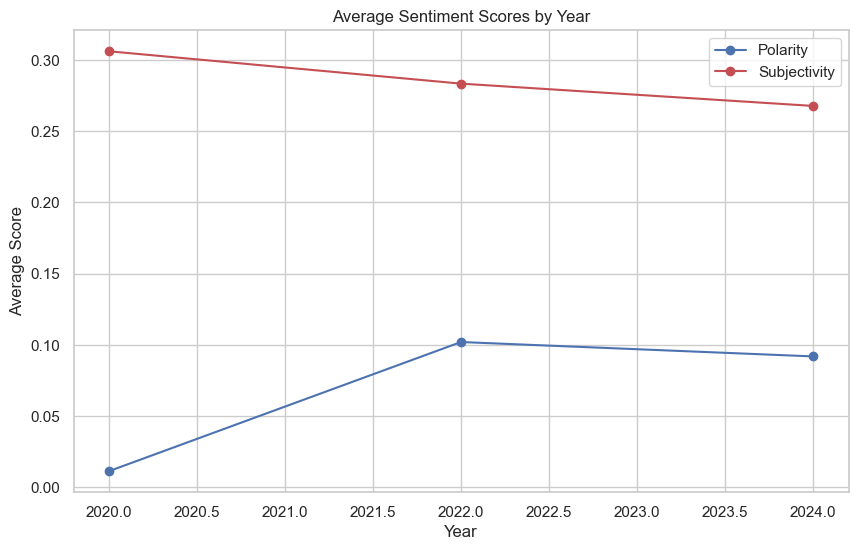

In [96]:
import matplotlib.pyplot as plt

# Plot sentiment scores over time
plt.figure(figsize=(10, 6))

# Plot Polarity
plt.plot(yearly_sentiment['year'], yearly_sentiment['polarity'], marker='o', linestyle='-', color='b', label='Polarity')

# Plot Subjectivity
plt.plot(yearly_sentiment['year'], yearly_sentiment['subjectivity'], marker='o', linestyle='-', color='r', label='Subjectivity')

# Add titles and labels
plt.title('Average Sentiment Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
